## Beer Tap Offerings MDP


This section sets up the code for future sections along with simulating a Markov Chain, with the following sections defining a MDP.

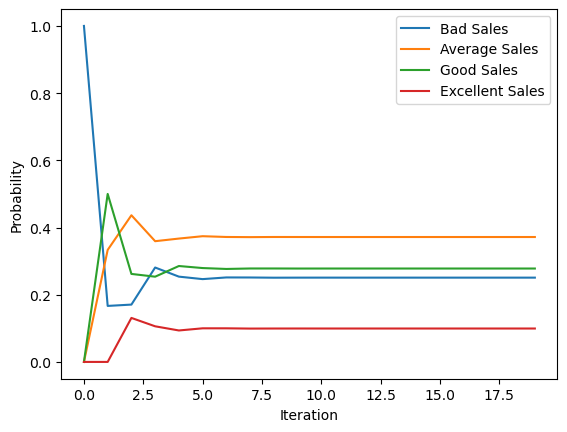

In [4]:
import numpy as np
import plotly.express as px 
import pandas as pd
from random import seed
from random import random
import mchmm as mc
import graphviz
import matplotlib.pyplot as plt
P = np.array([[1/6, 2/6, 3/6, 0/6],
              [3/7, 1/7, 2/7, 1/7],
              [0/6, 4/6, 1/6, 1/6],
              [3/6, 3/6, 0/6, 0/6]])
state=np.matrix([[1.0, 0.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0]]
S = ['BS', 'AS', 'GS', 'ES']
codes_S =  ('1','2','3','4')
n = 20
state_hist = np.empty((n, 4))

# Simulate the Markov chain
for i in range(n):
    state_hist[i] = state
    state = state.dot(P)

plt.plot(state_hist)
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.legend(['Bad Sales', 'Average Sales', 'Good Sales', 'Excellent Sales'])
plt.show()

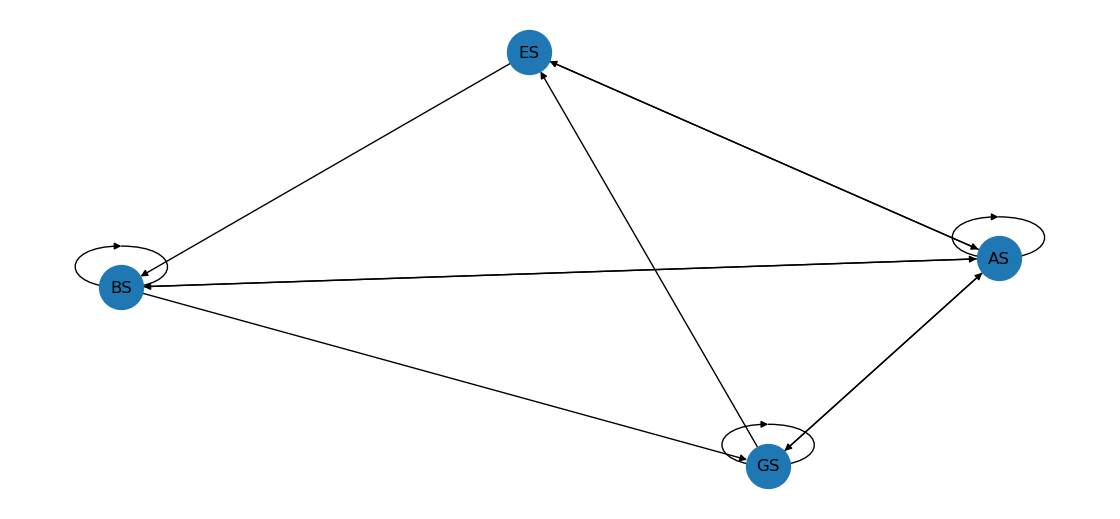

In [49]:
# AI NETWORK
import networkx as nx
import matplotlib.pyplot as plt

def draw_markov_chain(p_matrix, state_space):
  """Draws a Markov chain from a p-matrix and a state space.

  Args:
    p_matrix: A square matrix of transition probabilities.
    state_space: A list of strings representing the states of the Markov chain.

  Returns:
    A matplotlib figure object.
  """

  # Import the necessary libraries.
  import matplotlib.pyplot as plt
  import networkx as nx

  # Create a networkx graph.
  G = nx.DiGraph()
  for i, state in enumerate(state_space):
    G.add_node(state)
    for j, probability in enumerate(p_matrix[i]):
      if probability > 0:
        G.add_edge(state, state_space[j], weight=probability)

  # Draw the graph.
  plt.figure()
  nx.draw(G, with_labels=True, node_size=1000, edge_color='black')
  plt.axis('off')
  plt.show()

draw_markov_chain(P, S)

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from quantecon import MarkovChain

mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1_000_000)
print(np.mean(X == 0))
print(np.mean(X == 1))
print(np.mean(X == 2))
print(np.mean(X == 3))

0.250845
0.371832
0.278375
0.098948


In [39]:
mc = qe.MarkovChain(P)
print(f"This is our Stationary Distribution: {mc.stationary_distributions}")
print(f"This is our Period: {mc.period}")
print(f"Is this aperiodic?: {mc.is_aperiodic}")
print(f"Is this irreducible?: {mc.is_irreducible}")
print(f"These our are communication classes: {mc.communication_classes}")


This is our Stationary Distribution: [[0.25084746 0.37175141 0.2779661  0.09943503]]
This is our Period: 1
Is this aperiodic?: True
Is this irreducible?: True
These our are communication classes: [array([0, 1, 2, 3])]


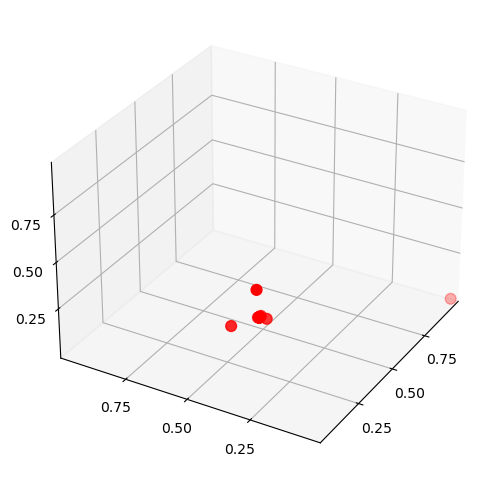

In [41]:
ψ = (1.0, 0.0, 0.0, 0.0)        # Initial condition

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(ψ[0])
    y_vals.append(ψ[1])
    z_vals.append(ψ[2])
    ψ = ψ @ P

ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2],  c='k', s=60)

plt.show()

In [22]:
from mdptoolbox.mdp import ValueIteration
from mdptoolbox.example import forest, small

def value_iteration(example, gamma = 0.9):
    # Need probability (transition) and reward matrices
    probability_matrix, reward_matrix = example()
    
    # Setup value iteration
    vi = ValueIteration(probability_matrix,
                        reward_matrix,
                        gamma)
    vi.run()
    print('Optimal policy : {}'.format(vi.policy))
    print('Expected value : {}'.format(vi.V))


In [36]:
# Initialize Markov Decision Process model: Increase Profit
actions = (0, 1)  # actions (0 = Nothing, 1 = Get New Menu)
states = (0, 1, 2, 3, 4)  # states 
rewards = [-482.75, -321.73, -160.73, 0, -188.42]  # Direct rewards per state (State 4 = Means that an action took place)
gamma = 0.08  # discount factor (reduction of award)
delta = 0  # Error tolerance
# Transition probabilities per state-action pair (Do Nothing, Get New Menu)
probs = [
    [[(1/6), 0], [(2/6), 0], [(3/6), 0], [0, 0], [0, 1]],  #0 (Bad)
    [[(3/7), 0], [(1/7), 0], [(2/7), 0], [(1/7), 0], [0, 1]], #1 (Average)
    [[(0/6), 0], [(1/6), 0], [(1/6), 0], [(3/6), 0], [0, 1]], #2 (Good)
    [[(3/6), 1], [(3/6), 0], [0, 0], [0, 0], [0, 0]], #3 (Excellent: Assuming that you wouldn't change in Excellent State)
    [[(3/6), 1], [(3/6), 0], [0, 0], [0, 0], [0, 0]] #4 (Excellent - Change Menu, Assuming that you switch it twice in a row, and it will work the same way.)
]

max_policy_iter = 10000
max_value_iter = 10000 
pi = [0 for s in states]
V = [0 for s in states]

for i in range(max_policy_iter):
    optimal_policy_found = True

    # Policy evaluation
    for j in range(max_value_iter):
        max_diff = 0  # Delta
        V_new = [0 for s in states] 
        for s in states:

            # Compute state value
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][pi[s]] * (
                        gamma * V[s_next]
                )  # Add discounted downstream values

            # Update maximum difference
            max_diff = max(max_diff, abs(val - V[s]))

            V_new[s] = val 
        if max_diff < delta:
            break
        V = V_new

    # Policy iteration
    for s in states:
        val_max = V[s]
        for a in actions:
            val = rewards[s]  
            for s_next in states:
                val += probs[s][s_next][a] * (
                    gamma * V[s_next]
                ) 
            if val > val_max and pi[s] != a:
                pi[s] = a
                val_max = val
                optimal_policy_found = False
    # If policy did not change, algorithm terminates
    if optimal_policy_found:
        print(pi)
        print(V)
        break

[1, 1, 0, 0, 0]
[-500.51161030595813, -339.49161030595815, -168.85191887539713, -33.600128824476656, -222.02012882447664]


In [5]:
# Initialize Markov Decision Process: One-Step up with new menu 
actions = (0, 1)  # actions (0=Nothing, 1=Get New Menu)
states = (0, 1, 2, 3, 4)  # states (tiles)
rewards = [640.50, 801.52, 962.52, 1123.52, 935.12]  # Cost Built-in
gamma = 0.08  # discount factor
delta = 10  # Error tolerance
# Transition probabilities per state-action pair (Do Nothing, Get New Menu)
probs = [
    [[(1/6), 0], [(2/6), 1], [(3/6), 0], [0, 0], [0, 0]],
    [[(3/7), 0], [(1/7), 0], [(2/7), 1], [(1/7), 0], [0, 0]],
    [[(0/6), 0], [(4/6), 0], [(1/6), 0], [(1/6), 0], [0, 1]],
    [[(3/6), 0], [(3/6), 0], [0, 0], [0, 0], [0, 1]],
    [[(3/6), 0], [(3/6), 0], [0, 0], [0, 0], [0, 1]],
    [[(3/6), 0], [(3/6), 0], [0, 0], [0, 0], [0, 1]]
]

# Set policy iteration parameters
max_policy_iter = 10000  # Maximum number of policy iterations
max_value_iter = 10000  # Maximum number of value iterations
pi = [0 for s in states]
V = [0 for s in states]

for i in range(max_policy_iter):
    # Initial assumption: policy is stable
    optimal_policy_found = True

    # Policy evaluation
    # Compute value for each state under current policy
    for j in range(max_value_iter):
        max_diff = 0  # Initialize max difference
        V_new = [0, 0, 0, 0, 0]  # Initialize values
        for s in states:

            # Compute state value
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][pi[s]] * (
                        gamma * V[s_next]
                )  # Add discounted downstream values

            # Update maximum difference
            max_diff = max(max_diff, abs(val - V[s]))

            V[s] = val  # Update value with highest value
        # If diff smaller than threshold delta for all states, algorithm terminates
        if max_diff < delta:
            break

    # Policy iteration
    # With updated state values, improve policy if needed
    for s in states:
        val_max = V[s]
        for a in actions:
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][a] * (
                    gamma * V[s_next]
                )  # Add discounted downstream values

            # Update policy if (i) action improves value and (ii) action different from current policy
                if val > val_max and pi[s] != a:
                    pi[s] = a
                    val_max = val
                    optimal_policy_found = False
    # If policy did not change, algorithm terminates
    if optimal_policy_found:
        print(pi)
        print(V)
        break

TypeError: list indices must be integers or slices, not numpy.float64

In [21]:
# Initialize Markov Decision Process: Increase Sales
actions = (0, 1)  # actions (0=Nothing, 1=Get New Menu)
states = (0, 1, 2, 3)  # states (tiles)
rewards = [640.50, 801.52, 962.52, 1123.52]  # Direct rewards per state (No Cost for Menus)
gamma = 0.08  # discount factor
delta = 10  # Error tolerance
# Transition probabilities per state-action pair (Do Nothing, Get New Menu)
probs = [
    [[(1/6), 0], [(2/6), 0], [(3/6), 0], [0, 1], [0, 0]],
    [[(3/7), 0], [(1/7), 0], [(2/7), 1], [(1/7), 0], [0, 0]],
    [[(0/6), 0], [(4/6), 0], [(1/6), 0], [(1/6), 0], [0, 1]],
    [[(3/6), 0], [(3/6), 0], [0, 0], [0, 0], [0, 1]],
    [[(3/6), 0], [(3/6), 0], [0, 0], [0, 0], [0, 0]]
]

# Set policy iteration parameters
max_policy_iter = 10000  # Maximum number of policy iterations
max_value_iter = 10000  # Maximum number of value iterations
pi = [0 for s in states]
V = [0 for s in states]

for i in range(max_policy_iter):
    # Initial assumption: policy is stable
    optimal_policy_found = True

    # Policy evaluation
    # Compute value for each state under current policy
    for j in range(max_value_iter):
        max_diff = 0  # Initialize max difference
        V_new = [0, 0, 0, 0, 0]  # Initialize values
        for s in states:

            # Compute state value
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][pi[s]] * (
                        gamma * V[s_next]
                )  # Add discounted downstream values

            # Update maximum difference
            max_diff = max(max_diff, abs(val - V[s]))

            V[s] = val  # Update value with highest value
        # If diff smaller than threshold delta for all states, algorithm terminates
        if max_diff < delta:
            break

    # Policy iteration
    # With updated state values, improve policy if needed
    for s in states:
        val_max = V[s]
        for a in actions:
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][a] * (
                    gamma * V[s_next]
                )  # Add discounted downstream values

            # Update policy if (i) action improves value and (ii) action different from current policy
                if val > val_max and pi[s] != a:
                    pi[s] = a
                    val_max = val
                    optimal_policy_found = False
    # If policy did not change, algorithm terminates
    if optimal_policy_found:
        print(pi)
        print(V)
        break

[1, 1, 0, 0]
[735.5658698580519, 884.6701739627929, 1039.4050832481564, 1188.3294417528336]
